<a href="https://colab.research.google.com/github/kimchaeyoung-student/pdm04/blob/master/py-tensorflow/tf2_7_fmnist_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of fashion mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display images
- one random images
- 10 representative images

31763


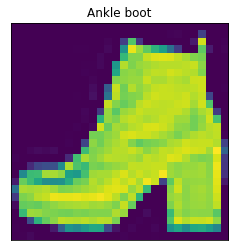

In [5]:
# Code here!

# display one random image from our training set:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image)
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

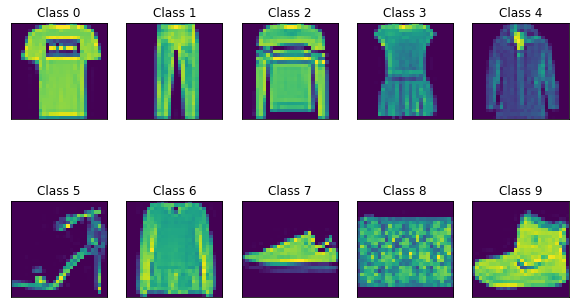

In [6]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [7]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [8]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가해주기
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [9]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [10]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4218 - accuracy: 0.8506
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.8961
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9107
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2179 - accuracy: 0.9190
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1957 - accuracy: 0.9274
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1763 - accuracy: 0.9343
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1617 - accuracy: 0.9406
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1444 - accuracy: 0.9460
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1345 - accuracy: 0.9490
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.122

In [11]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.9164


[0.37453216314315796, 0.9164000153541565]

## **CNN1 + FCN3**

In [12]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가해주기
    Dense(256, activation='relu'),  
    Dropout(0.25), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [14]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4460 - accuracy: 0.8405
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8931
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9084
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2181 - accuracy: 0.9183
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1952 - accuracy: 0.9267
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1727 - accuracy: 0.9367
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1574 - accuracy: 0.9417
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9480
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9535
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.116

In [15]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.9174


[0.3958949148654938, 0.9174000024795532]

## **CNN2 + FCN2**

In [16]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가해주기
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [18]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4293 - accuracy: 0.8462
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.8961
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402 - accuracy: 0.9112
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2085 - accuracy: 0.9222
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1860 - accuracy: 0.9301
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1665 - accuracy: 0.9377
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1508 - accuracy: 0.9427
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1322 - accuracy: 0.9492
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1214 - accuracy: 0.9538
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.108

In [19]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3872 - accuracy: 0.9200


[0.38719236850738525, 0.9200000166893005]

## **CNN2 + FCN3**

In [20]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가해주기
    Dense(256, activation='relu'),  
    Dropout(0.25), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               803072    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [22]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4469 - accuracy: 0.8385
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.8946
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2422 - accuracy: 0.9118
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2093 - accuracy: 0.9234
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1880 - accuracy: 0.9302
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1670 - accuracy: 0.9380
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1476 - accuracy: 0.9449
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1325 - accuracy: 0.9510
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1211 - accuracy: 0.9541
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.110

In [23]:
c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.9190


[0.3882679343223572, 0.9190000295639038]

# **[DIY] Hidden layer에 따른 정확도**

In [24]:
c1f2score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3score = c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.9190


In [25]:
accuracy = [c1f2score[1], c1f3score[1], c2f2score[1], c2f3score[1]]
accuracy

[0.9164000153541565,
 0.9174000024795532,
 0.9200000166893005,
 0.9190000295639038]

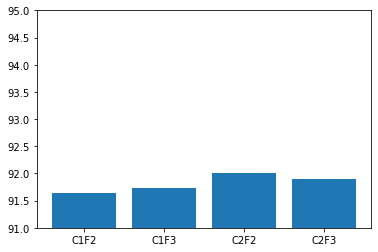

In [28]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((91, 95))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [29]:
c2f2.save('fmnist_cnn_best.hdf5')

In [30]:
from keras.models import load_model

model = load_model('fmnist_cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3872 - accuracy: 0.9200


[0.38719236850738525, 0.9200000166893005]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [31]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test)) # 검증정확도

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.3653 - val_accuracy: 0.9273
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9811 - val_loss: 0.4106 - val_accuracy: 0.9236
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9817 - val_loss: 0.4309 - val_accuracy: 0.9264
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9824 - val_loss: 0.4084 - val_accuracy: 0.9207
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9835 - val_loss: 0.4257 - val_accuracy: 0.9264
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9841 - val_loss: 0.4868 - val_accuracy: 0.9214
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9840 - val_loss: 0.4813 - val_accuracy:

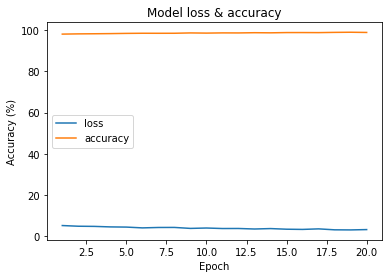

In [32]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [33]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

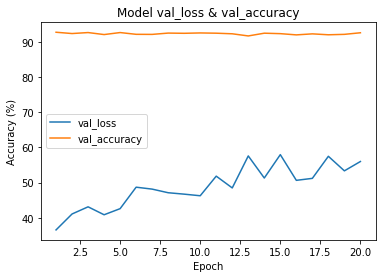

In [34]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

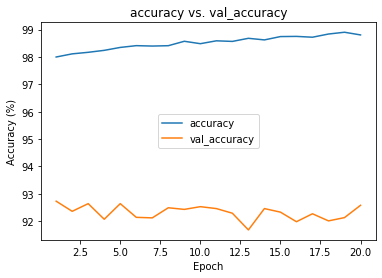

In [35]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

# **CNN model of fashion mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: **Find the best model**

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [36]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [38]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [39]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9882 - val_loss: 0.5450 - val_accuracy: 0.9239
Epoch 2/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0329 - accuracy: 0.9885 - val_loss: 0.5453 - val_accuracy: 0.9236
Epoch 3/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9889 - val_loss: 0.6854 - val_accuracy: 0.9242
Epoch 4/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.5787 - val_accuracy: 0.9236
Epoch 5/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0305 - accuracy: 0.9896 - val_loss: 0.6068 - val_accuracy: 0.9228
Epoch 6/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.6643 - val_accuracy: 0.9203
Epoch 7/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.6619 - val_ac

In [40]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.9737 - accuracy: 0.9170


[0.9736553430557251, 0.9169999957084656]

## Graph of loss and accuracy
- model: C2F2

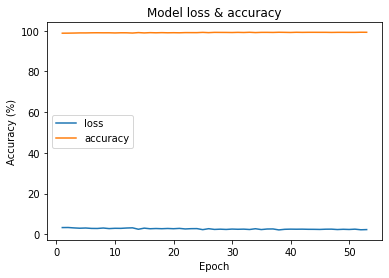

In [41]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 53
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [42]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

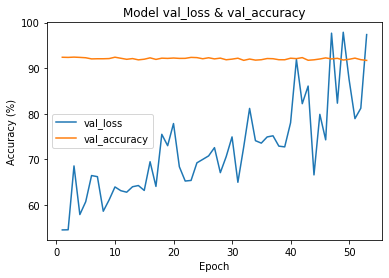

In [43]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [44]:
np.argmax(np.array(vacc_list))

2

In [45]:
vacc_list[np.argmax(np.array(vacc_list))]

92.41999983787537

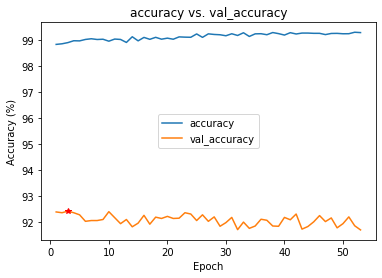

In [46]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

> fmnist_c2f2_best_weights.003-0.9242.hdf5

In [47]:
from keras.models import load_model

model = load_model('fmnist_c2f2_best_weights.003-0.9242.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.9242


[0.6854167580604553, 0.9241999983787537]

***